<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Pie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

#2.한글패치

In [39]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache  -fv
!rm -/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
rm: invalid option -- '/'
Try 'rm --help' 

In [1]:
import matplotlib.pyplot as plt

In [2]:
plt.rc('font',family='NanumBarunGothic')

#3. Load data

In [3]:
import pandas as pd

In [4]:
file='/gdrive/MyDrive/data/data_2021.csv'
data=pd.read_csv(file)

In [5]:
#data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37132 entries, 0 to 37131
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37132 non-null  int64
 1   집계시      37132 non-null  int64
 2   출발영업소코드  37132 non-null  int64
 3   도착영업소코드  37132 non-null  int64
 4   통행시간     37132 non-null  int64
 5   요일       37132 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. Select Data
집계시

In [6]:
data_6_22 = data[data.집계시.isin(range(6,23))]

In [7]:
#Creat data frame with counting by 집계시
data_6_22.sort_values(by=['집계시'])

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
29579,20210312,6,101,120,6934,4
5983,20210116,6,101,115,4896,16
5984,20210116,6,101,115,5592,16
2571,20210108,6,101,105,734,8
2570,20210108,6,101,105,820,8
...,...,...,...,...,...,...
30514,20210316,22,101,115,6289,1
30515,20210316,22,101,115,4883,1
35650,20210317,22,101,110,3412,2
19745,20210218,22,101,125,8800,3


In [8]:
data_6_22_counting = data_6_22['집계시'].value_counts()

In [9]:
data_6_22_counting.head()

10    1738
11    1735
14    1732
12    1729
13    1726
Name: 집계시, dtype: int64

In [10]:
x= data_6_22_counting.index

In [11]:
labels = [str(i)+'시' for i in x]
len(labels)

17

In [12]:
explode = [0.1, 0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [13]:
y= data_6_22_counting.values

#5. Pie Chart

In [14]:
#Configue figure size 
plt.figure(figsize = (7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

<function matplotlib.pyplot.show>

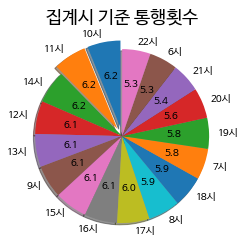

In [15]:
#Create pie Chart
plt.pie(y, explode= explode, labels = labels , startangle = 90, shadow = 90 , autopct = '%.1f')
#Generate labels and title
plt.title("집계시 기준 통행횟수", fontsize = 18)
#Show plot
plt.show

#6.도착영업소코드


In [18]:
data_dest_counting = data['도착영업소코드'].value_counts()
data_dest_counting.head()

105    12209
110     9300
115     6555
140     2122
125     1871
Name: 도착영업소코드, dtype: int64

In [19]:
x=data_dest_counting.index

In [20]:
labels = [str(i) for i in x]

In [24]:
labels =['기흥','옥천','대전', '부산', '동김천', '경주','남구미','황간' ]
labels

['기흥', '옥천', '대전', '부산', '동김천', '경주', '남구미', '황간']

In [26]:
explode = [0.2, 0.1, 0, 0 ,0 ,0 ,0 ,0]

In [27]:
y= data_dest_counting.values

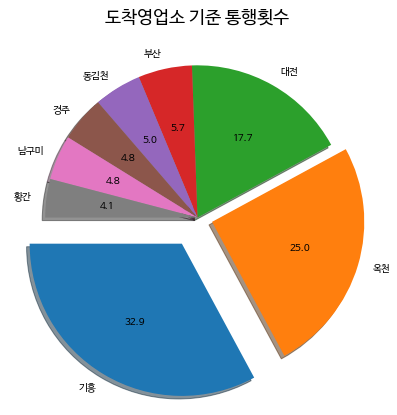

In [30]:
plt.figure(figsize=(7,7))
plt.pie(y,labels=labels, explode = explode, shadow =True, autopct='%.1f', startangle=180)
plt.title('도착영업소 기준 통행횟수', fontsize =18)
plt.show()